# Analysing a PPG signal

This notebook is aimed at those with no knowledge of HeartPy. It contains a few simple examples of the API available.

In this notebook we'll go over how to analyse a regular PPG signal with HeartPy.

For this we'll use the example datasets that are packaged with HeartPy.

In [142]:
#First let's import
import heartpy as hp
import matplotlib.pyplot as plt

HeartPy comes with a function ***load_exampledata()*** that can load the datasets provded. It will return a tuple (data, timer), where 'timer' is the timer column (ms or datetime). If no timer column is available a tuple is still returned, but with timer array being empty.

There's three datasets included with HeartPy:
- 0 : a short, very clean PPG signal, sampled at 100.0 Hz
- 1 : a slightly longer (~2 minute) PPG signal, with missing signal in first third, and random noise spikes in rest of signal
- 2 : a long (~11.5 minute) PPG signal recorded 'in the wild' while driving in a driving simulator using a Pulse Sensor on the index finger and an Arduino

---------

Let's go through all three examples and run an analysis for each.

In [2]:
# #first let's load the clean PPG signal
# data, timer = hp.load_exampledata(0)

# #and visualise
# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

#### That is a beautiful signal. Analysis should pose no issue

when running ***hp.process()***, two dicts are returned: working_data (containing working data that you may want to access nonetheless, like peak positions and peak-peak intervals), and measures (containing the computed output measures).

In the docs we abbreviate these to **'wd'** and **'m'**

In [3]:
# #run the analysis
# wd, m = hp.process(data, sample_rate = 100.0)

#### Now you may want to visualize the results of the analysis.

Heartpy comes with a function ***hp.plotter(wd, m)*** that does just this. The function requires you to give it the working_data and measures dict.

If you specify parameters like a figure size to matplotlib before calling ***hp.plotter(wd, m)***, the specified figure size will be used.

In [4]:
# #set large figure
# plt.figure(figsize=(12,4))

# #call plotter
# hp.plotter(wd, m)

# #display measures computed
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

That looks nice, and we ran into no problems.

----------

Let's move on to the second included dataset and explore it first:

In [5]:
# data, timer = hp.load_exampledata(1)

# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

This is a more tricky signal I made intentionally. There's no signal in the beginning as I started recording before and while putting on the sensor. After the signal commences there's a few noise spikes as I forcefully moved the sensor while recording. This imitates what may happen when recording 'in the wild' as well if the participant moves and accidentally tugs at a sensor cable.

HeartPy is designed to handle this sort of thing out of the box. Let's look at the example first:

In [6]:
# sample_rate = hp.get_samplerate_mstimer(timer)

# wd, m = hp.process(data, sample_rate)

# #plot
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display measures computed
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

Note we computed the sample_rate from a timer column (that was in ms values). This is important beforehand since we didn't know with what sample_rate the signal was sampled. All measures depend on knowing the sample rate.

HeartPy comes with two functions: ***hp.get_samplerate_mstimer()*** that computes sample rate based on a ms-timer, and ***hp.get_samplerate_datetime()***, that computes sample_rate based on a column in datetime values.

You saw how we used the mstimer earlier, now let's look at a 'in the wild' recording that uses datetime strings to encode time:

In [7]:
# data, timer = hp.load_exampledata(2)
# import csv
# # export data and timer to csv
# csvfile = open('presetheartdata.csv', 'w')
# with open('presetheartdata.csv', 'w') as csvfile:
# 	writer = csv.writer(csvfile)
# 	writer.writerow(['data', 'timer'])
# #  add data to csv
# 	for i in range(len(data)):
# 		writer.writerow([timer[i], data[i]])

In [8]:
# # replace . with : in timer
# for i in range(len(timer)):
# 	timer[i] = timer[i].replace('.', ':')

In [9]:
# mydict = {}
# for i in range(len(data)):
# 	mydict[timer[i]] = data[i]

# import json

# mydict
# myjsondict = {}
# myjsondict["gsr"] = 0
# myjsondict["pulse"] = mydict
# myjsondict

# with open('presetheartdata.json', 'w') as outfile:
# 	json.dump(myjsondict, outfile)

In [4]:
import firebase_admin
import google.cloud
from firebase_admin import credentials

cred_obj = firebase_admin.credentials.Certificate('ServiceAccountKey.json')
default_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':'https://nodemcutest-e668d-default-rtdb.firebaseio.com/'
	})

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [358]:
from firebase_admin import db
ref = db.reference('/pulsetest/pushpulse')
data = ref.get()

In [359]:
data

{'data': {'-MvjpSFWdP9KuMpsvHt3': {'Ts': 1644701275169,
   'gsrdetect': '16180',
   'pulsedetect': '549',
   'time': '22:28:21'},
  '-MvjpSi4Zmvl89IGd-1J': {'Ts': 1644701277061,
   'gsrdetect': '16198',
   'pulsedetect': '549',
   'time': '13:27:55'},
  '-MvjpTA7favm134w1cb2': {'Ts': 1644701278921,
   'gsrdetect': '16206',
   'pulsedetect': '547',
   'time': '13:27:56'},
  '-MvjpTbmi_dIiL60Mwzo': {'Ts': 1644701280755,
   'gsrdetect': '16196',
   'pulsedetect': '549',
   'time': '13:27:58'},
  '-MvjpU3ramPWBGYZOV0r': {'Ts': 1644701282615,
   'gsrdetect': '16228',
   'pulsedetect': '549',
   'time': '13:28:00'},
  '-MvjpUWQUT343ccUSTLF': {'Ts': 1644701284443,
   'gsrdetect': '16213',
   'pulsedetect': '549',
   'time': '13:28:02'},
  '-MvjpUza-87FZzztIvkj': {'Ts': 1644701286374,
   'gsrdetect': '16181',
   'pulsedetect': '549',
   'time': '13:28:04'},
  '-MvjpVQalkAPYShPK9-E': {'Ts': 1644701288167,
   'gsrdetect': '16167',
   'pulsedetect': '549',
   'time': '13:28:06'},
  '-MvjpVsgqD6aW

In [360]:
# get 1st row
df.iloc[0]
df = pd.DataFrame(data)
# df = df.T

In [361]:
df.shape
df

,data
-MvjpSFWdP9KuMpsvHt3,"{'Ts': 1644701275169, 'gsrdetect': '16180', 'p..."
-MvjpSi4Zmvl89IGd-1J,"{'Ts': 1644701277061, 'gsrdetect': '16198', 'p..."
-MvjpTA7favm134w1cb2,"{'Ts': 1644701278921, 'gsrdetect': '16206', 'p..."
-MvjpTbmi_dIiL60Mwzo,"{'Ts': 1644701280755, 'gsrdetect': '16196', 'p..."
-MvjpU3ramPWBGYZOV0r,"{'Ts': 1644701282615, 'gsrdetect': '16228', 'p..."
...,...
-MvjvZM-mvAM-61rwEBu,"{'Ts': 1644702877120, 'pulsedetect': '550', 't..."
-MvjvZoEAOXmU3U2IbZv,"{'Ts': 1644702878991, 'pulsedetect': '552', 't..."
-Mvjv_GENXzQvAUb11t_,"{'Ts': 1644702880847, 'pulsedetect': '549', 't..."
-Mvjv_iAt5phnAXU7AUu,"{'Ts': 1644702882699, 'pulsedetect': '550', 't..."


In [362]:
df.reset_index(drop=True, inplace=True)
keys = np.array(list(df["data"][0].keys()))
# values = np.array(list(df["data"][0].values()))
# keys.T
df

,data
0,"{'Ts': 1644701275169, 'gsrdetect': '16180', 'p..."
1,"{'Ts': 1644701277061, 'gsrdetect': '16198', 'p..."
2,"{'Ts': 1644701278921, 'gsrdetect': '16206', 'p..."
3,"{'Ts': 1644701280755, 'gsrdetect': '16196', 'p..."
4,"{'Ts': 1644701282615, 'gsrdetect': '16228', 'p..."
...,...
158,"{'Ts': 1644702877120, 'pulsedetect': '550', 't..."
159,"{'Ts': 1644702878991, 'pulsedetect': '552', 't..."
160,"{'Ts': 1644702880847, 'pulsedetect': '549', 't..."
161,"{'Ts': 1644702882699, 'pulsedetect': '550', 't..."


In [363]:
# create datafrome with keys as columns
dfi = pd.DataFrame(columns=keys)
dfi

,Ts,gsrdetect,pulsedetect,time


In [364]:
df['data'][0].values()

dict_values([1644701275169, '16180', '549', '22:28:21'])

In [365]:
for i in range(len(df["data"])):
    # append each row to dataframe
    dfi = dfi.append((df["data"][i]), ignore_index=True)

dfi

/tmp/ipykernel_15440/723182763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfi = dfi.append((df["data"][i]), ignore_index=True)
/tmp/ipykernel_15440/723182763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfi = dfi.append((df["data"][i]), ignore_index=True)
/tmp/ipykernel_15440/723182763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfi = dfi.append((df["data"][i]), ignore_index=True)
/tmp/ipykernel_15440/723182763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfi = dfi.append((df["data"][i]), ignore_index=True)
/tmp/ipykernel_15440/723182763.py:3: FutureWarning: The frame.append method is deprecated and will b

,Ts,gsrdetect,pulsedetect,time
0,1644701275169,16180,549,22:28:21
1,1644701277061,16198,549,13:27:55
2,1644701278921,16206,547,13:27:56
3,1644701280755,16196,549,13:27:58
4,1644701282615,16228,549,13:28:00
...,...,...,...,...
158,1644702877120,NaN,550,13:54:35
159,1644702878991,NaN,552,13:54:37
160,1644702880847,NaN,549,13:54:39
161,1644702882699,NaN,550,13:54:41


In [366]:
import datetime
epoch_time = 1571005498
# datetime_time = datetime.datetime.fromtimestamp(1644701275)
dfi["Ts"][0]

1644701275169

In [367]:
dfi["Ts"] = dfi["Ts"].apply(lambda x: x/1000)

In [368]:
dfi["formatted_time"] = dfi["Ts"].apply(lambda x: datetime.datetime.fromtimestamp(x))
# dfi["formatted_time"] = dfi["formatted_time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [369]:
dfi.head(30)


,Ts,gsrdetect,pulsedetect,time,formatted_time
0,1.644701e+09,16180,549,22:28:21,2022-02-12 13:27:55.169
1,1.644701e+09,16198,549,13:27:55,2022-02-12 13:27:57.061
2,1.644701e+09,16206,547,13:27:56,2022-02-12 13:27:58.921
3,1.644701e+09,16196,549,13:27:58,2022-02-12 13:28:00.755
4,1.644701e+09,16228,549,13:28:00,2022-02-12 13:28:02.615
5,1.644701e+09,16213,549,13:28:02,2022-02-12 13:28:04.443
6,1.644701e+09,16181,549,13:28:04,2022-02-12 13:28:06.374
7,1.644701e+09,16167,549,13:28:06,2022-02-12 13:28:08.167
8,1.644701e+09,16186,549,13:28:07,2022-02-12 13:28:10.028
9,1.644701e+09,16171,548,13:28:09,2022-02-12 13:28:11.860


In [370]:
timer = dfi["formatted_time"]
datah = dfi["pulsedetect"]

When computing the sample rate we need to give ***get_samplerate_datetime()*** the format of the string (by default it expects HH:MM:SS.ms):

In [371]:
# convert formatted_time to string
# dfi["formatted_time"] = dfi["formatted_time"].apply(lambda x: str(x) )
dfi['formatted_time'][0]

Timestamp('2022-02-12 13:27:55.169000')

In [372]:
datatest, timertest = hp.load_exampledata(2)
sample_rate = hp.get_samplerate_datetime(timertest, timeformat='%Y-%m-%d %H:%M:%S.%f')
sample_rate
timertest

array(['2016-11-24 13:58:58.081000', '2016-11-24 13:58:58.097000',
       '2016-11-24 13:58:58.097000', ..., '2016-11-24 14:10:19.964000',
       '2016-11-24 14:10:19.964000', '2016-11-24 14:10:19.979000'],
      dtype='<U26')

In [373]:
# convert timer to array
timer = np.array(timer)
# remove last 3 signifcant digits
timer = timer.astype(str)
# remove last 3 characters
for i in range(len(timer)):
	timer[i] = timer[i][:-3]

timer

array(['2022-02-12T13:27:55.169000', '2022-02-12T13:27:57.061000',
       '2022-02-12T13:27:58.921000', '2022-02-12T13:28:00.755000',
       '2022-02-12T13:28:02.615000', '2022-02-12T13:28:04.443000',
       '2022-02-12T13:28:06.374000', '2022-02-12T13:28:08.167000',
       '2022-02-12T13:28:10.028000', '2022-02-12T13:28:11.860000',
       '2022-02-12T13:28:13.720000', '2022-02-12T13:28:15.545000',
       '2022-02-12T13:28:17.426000', '2022-02-12T13:28:19.303000',
       '2022-02-12T13:28:21.961000', '2022-02-12T13:28:23.831000',
       '2022-02-12T13:28:28.959000', '2022-02-12T13:28:30.732000',
       '2022-02-12T13:28:32.582000', '2022-02-12T13:28:34.391000',
       '2022-02-12T13:28:36.155000', '2022-02-12T13:28:37.938000',
       '2022-02-12T13:28:39.802000', '2022-02-12T13:28:41.690000',
       '2022-02-12T13:28:43.540000', '2022-02-12T13:28:45.339000',
       '2022-02-12T13:28:47.165000', '2022-02-12T13:28:48.990000',
       '2022-02-12T13:28:50.833000', '2022-02-12T13:28:52.7300

In [374]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%Y-%m-%dT%H:%M:%S.%f')

print('sample rate is: %f Hz' %sample_rate)
datah.dtype
# convert datah to int
datah = datah.astype(int)
datah.dtype


sample rate is: 0.101273 Hz


dtype('int64')

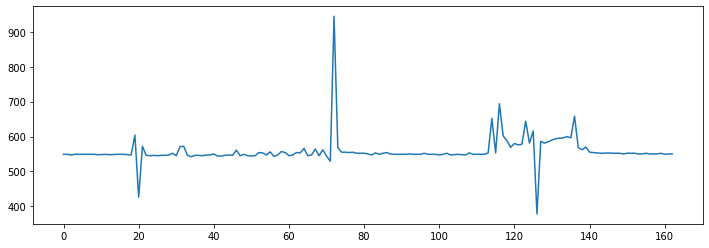

In [375]:
# plot datah 
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(datah)

Now that we know all that, running the analysis is the same as before:

In [376]:
wd, m = hp.process(datah, sample_rate, report_time = True)

import csv
openfile = open('presetheartdata.csv', 'w')
with open('presetheartdata.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['data', 'timer'])
    writer.writerow([wd, m])

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

/home/tb/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


bpm: 97.567863
ibi: 614.956584
sdnn: 66.641049
sdsd: 34.811778
rmssd: 44.705519
pnn20: 0.444557
pnn50: 0.122075
hr_mad: 31.207432
sd1: 31.611000
sd2: 85.515631
s: 8492.461880
sd1/sd2: 0.369652
breathingrate: 0.110937


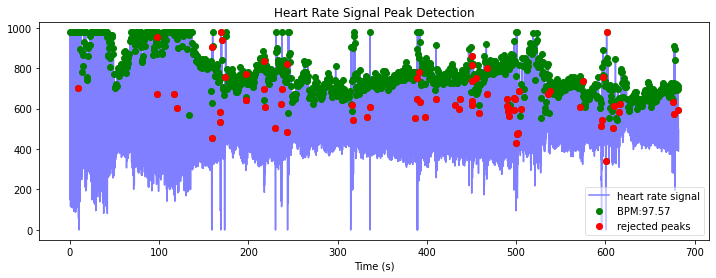

In [ ]:
# let's zoom in on a bit
# fig, ax = plt.subplots(figsize=(12,4))
hp.plotter(wd, m, figsize=(12,4))

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))